In [1]:
pip install statannot

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import t
from statannot import add_stat_annotation


import moabb
import moabb.analysis.plotting as moabb_plt
from moabb.analysis.meta_analysis import (  # noqa: E501
    compute_dataset_statistics,
    find_significant_differences,
)

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\moabb\pipelines\__init__.py:26: ModuleNotFoundError: Tensorflow is not installed. You won't be able to use these MOABB pipelines if you attempt to do so.
  warn(


# Get the results files

In [3]:
CNN_loo_sc = pd.read_csv("../results/score_code/CNN_LOO_score_code.csv",index_col=0)
CNN_looa_sc = pd.read_csv("../results/score_code/CNN_LOOA_score_code.csv",index_col=0)
CNN_wt_sc = pd.read_csv("../results/score_code/CNN_WT_score_code.csv",index_col=0)
CNN_loorec_sc = pd.read_csv("../results/score_code/CNN_LOO_score_code_recentered.csv",index_col=0)
CNN_looarec_sc = pd.read_csv("../results/score_code/CNN_LOOA_score_code_recentered.csv",index_col=0)
CNN_wtrec_sc = pd.read_csv("../results/score_code/CNN_WT_score_code_recentered.csv",index_col=0)

SPD_loo_sc = pd.read_csv("../results/score_code/SPD_LOO_score_code.csv",index_col=0)
SPD_looa_sc = pd.read_csv("../results/score_code/SPD_LOOA_score_code.csv",index_col=0)
SPD_wt_sc = pd.read_csv("../results/score_code/SPD_WT_score_code.csv",index_col=0)
SPD_loorec_sc = pd.read_csv("../results/score_code/SPD_LOO_score_code_recentered.csv",index_col=0)
SPD_looarec_sc = pd.read_csv("../results/score_code/SPD_LOOA_score_code_recentered.csv",index_col=0)
SPD_wtrec_sc = pd.read_csv("../results/score_code/SPD_WT_score_code_recentered.csv",index_col=0)

SPDBN_loo_sc = pd.read_csv("../results/score_code/SPDBN_LOO_score_code.csv",index_col=0)
SPDBN_looa_sc = pd.read_csv("../results/score_code/SPDBN_LOOA_score_code.csv",index_col=0)
SPDBN_wt_sc = pd.read_csv("../results/score_code/SPDBN_WT_score_code.csv",index_col=0)
SPDBN_loorec_sc = pd.read_csv("../results/score_code/SPDBN_LOO_score_code_recentered.csv",index_col=0)
SPDBN_looarec_sc = pd.read_csv("../results/score_code/SPDBN_LOOA_score_code_recentered.csv",index_col=0)
SPDBN_wtrec_sc = pd.read_csv("../results/score_code/SPDBN_WT_score_code_recentered.csv",index_col=0)

In [4]:
CNN_loo_tst = pd.read_csv("../results/tps_test/CNN_LOO_tps_test.csv",index_col=0)
CNN_looa_tst = pd.read_csv("../results/tps_test/CNN_LOOA_tps_test.csv",index_col=0)
CNN_wt_tst = pd.read_csv("../results/tps_test/CNN_WT_tps_test.csv",index_col=0)
CNN_loorec_tst = pd.read_csv("../results/tps_test/CNN_LOO_tps_test_recentered.csv",index_col=0)
CNN_looarec_tst = pd.read_csv("../results/tps_test/CNN_LOOA_tps_test_recentered.csv",index_col=0)
CNN_wtrec_tst = pd.read_csv("../results/tps_test/CNN_WT_tps_test_recentered.csv",index_col=0)

SPD_loo_tst = pd.read_csv("../results/tps_test/SPD_LOO_tps_test.csv",index_col=0)
SPD_looa_tst = pd.read_csv("../results/tps_test/SPD_LOOA_tps_test.csv",index_col=0)
SPD_wt_tst = pd.read_csv("../results/tps_test/SPD_WT_tps_test.csv",index_col=0)
SPD_loorec_tst = pd.read_csv("../results/tps_test/SPD_LOO_tps_test_recentered.csv",index_col=0)
SPD_looarec_tst = pd.read_csv("../results/tps_test/SPD_LOOA_tps_test_recentered.csv",index_col=0)
SPD_wtrec_tst = pd.read_csv("../results/tps_test/SPD_WT_tps_test_recentered.csv",index_col=0)

SPDBN_loo_tst = pd.read_csv("../results/tps_test/SPDBN_LOO_tps_test.csv",index_col=0)
SPDBN_looa_tst = pd.read_csv("../results/tps_test/SPDBN_LOOA_tps_test.csv",index_col=0)
SPDBN_wt_tst = pd.read_csv("../results/tps_test/SPDBN_WT_tps_test.csv",index_col=0)
SPDBN_loorec_tst = pd.read_csv("../results/tps_test/SPDBN_LOO_tps_test_recentered.csv",index_col=0)
SPDBN_looarec_tst = pd.read_csv("../results/tps_test/SPDBN_LOOA_tps_test_recentered.csv",index_col=0)
SPDBN_wtrec_tst = pd.read_csv("../results/tps_test/SPDBN_WT_tps_test_recentered.csv",index_col=0)

# Calcul the mean

In [5]:
print("mean of each fold for CNN_loo:\n",CNN_loo_sc.mean(axis=0))
print("mean of each fold for CNN_looa:\n",CNN_looa_sc.mean(axis=0))
print("mean of each fold for CNN_wt:\n",CNN_wt_sc.mean(axis=0))
print("mean of each fold for CNN_loorec:\n",CNN_loorec_sc.mean(axis=0))
print("mean of each fold for CNN_looa:\n",CNN_looarec_sc.mean(axis=0))
print("mean of each fold for CNN_wtrec:\n",CNN_wtrec_sc.mean(axis=0))

print("mean of each fold for SPD_loo:\n",SPD_loo_sc.mean(axis=0))
print("mean of each fold for SPD_looa:\n",SPD_looa_sc.mean(axis=0))
print("mean of each fold for SPD_wt:\n",SPD_wt_sc.mean(axis=0))
print("mean of each fold for SPD_loorec:\n",SPD_loorec_sc.mean(axis=0))
print("mean of each fold for SPD_looa:\n",SPD_looarec_sc.mean(axis=0))
print("mean of each fold for SPD_wtrec:\n",SPD_wtrec_sc.mean(axis=0))

print("mean of each fold for SPDBN_loo:\n",SPDBN_loo_sc.mean(axis=0))
print("mean of each fold for SPDBN_looa:\n",SPDBN_looa_sc.mean(axis=0))
print("mean of each fold for SPDBN_wt:\n",SPDBN_wt_sc.mean(axis=0))
print("mean of each fold for SPDBN_loorec:\n",SPDBN_loorec_sc.mean(axis=0))
print("mean of each fold for SPDBN_looa:\n",SPDBN_looarec_sc.mean(axis=0))
print("mean of each fold for SPDBN_wtrec:\n",SPDBN_wtrec_sc.mean(axis=0))

mean of each fold for CNN_loo:
 1     0.874
2     0.874
3     0.875
4     0.903
5     0.911
6     0.948
7     0.667
8     0.604
9     0.912
10    1.000
11    0.826
12    0.718
dtype: float64
mean of each fold for CNN_looa:
 1     0.880
2     0.870
3     0.885
4     0.953
5     0.922
6     0.949
7     0.631
8     0.996
9     0.939
10    0.996
11    0.856
12    0.726
dtype: float64
mean of each fold for CNN_wt:
 1     0.973
2     0.871
3     0.943
4     0.858
5     0.943
6     0.982
7     0.931
8     0.910
9     0.781
10    0.997
11    0.891
12    0.707
dtype: float64
mean of each fold for CNN_loorec:
 1     0.875
2     0.858
3     0.896
4     0.920
5     0.927
6     0.947
7     0.657
8     0.994
9     0.896
10    1.000
11    0.841
12    0.670
dtype: float64
mean of each fold for CNN_looa:
 1     0.875
2     0.900
3     0.909
4     0.940
5     0.937
6     0.955
7     0.661
8     0.991
9     0.912
10    1.000
11    0.893
12    0.702
dtype: float64
mean of each fold for CNN_wtrec:
 1     0

In [6]:
print("median of each fold for CNN_loo:\n",np.median(CNN_loo_sc.median(axis=0)))
print("median of each fold for CNN_looa:\n",np.median(CNN_looa_sc.median(axis=0)))
print("median of each fold for CNN_wt:\n",np.median(CNN_wt_sc.median(axis=0)))
print("median of each fold for CNN_loorec:\n",np.median(CNN_loorec_sc.median(axis=0)))
print("median of each fold for CNN_looarec:\n",np.median(CNN_looarec_sc.median(axis=0)))
print("median of each fold for CNN_wtrec:\n",np.median(CNN_wtrec_sc.median(axis=0)))

print("median of each fold for SPD_loo:\n",np.median(SPD_loo_sc.median(axis=0)))
print("median of each fold for SPD_looa:\n",np.median(SPD_looa_sc.median(axis=0)))
print("median of each fold for SPD_wt:\n",np.median(SPD_wt_sc.median(axis=0)))
print("median of each fold for SPD_loorec:\n",np.median(SPD_loorec_sc.median(axis=0)))
print("median of each fold for SPD_looarec:\n",np.median(SPD_looarec_sc.median(axis=0)))
print("median of each fold for SPD_wtrec:\n",np.median(SPD_wtrec_sc.median(axis=0)))

print("median of each fold for SPDBN_loo:\n",np.median(SPDBN_loo_sc.median(axis=0)))
print("median of each fold for SPDBN_looa:\n",np.median(SPDBN_looa_sc.median(axis=0)))
print("median of each fold for SPDBN_wt:\n",np.median(SPDBN_wt_sc.median(axis=0)))
print("median of each fold for SPDBN_loorec:\n",np.median(SPDBN_loorec_sc.median(axis=0)))
print("median of each fold for SPDBN_looarec:\n",np.median(SPDBN_looarec_sc.median(axis=0)))
print("median of each fold for SPDBN_wtrec:\n",np.median(SPDBN_wtrec_sc.median(axis=0)))

median of each fold for CNN_loo:
 0.88
median of each fold for CNN_looa:
 0.905
median of each fold for CNN_wt:
 0.925
median of each fold for CNN_loorec:
 0.895
median of each fold for CNN_looarec:
 0.91
median of each fold for CNN_wtrec:
 0.9325
median of each fold for SPD_loo:
 0.89
median of each fold for SPD_looa:
 0.89
median of each fold for SPD_wt:
 0.9025000000000001
median of each fold for SPD_loorec:
 0.875
median of each fold for SPD_looarec:
 0.91
median of each fold for SPD_wtrec:
 0.9175
median of each fold for SPDBN_loo:
 0.8374999999999999
median of each fold for SPDBN_looa:
 0.88
median of each fold for SPDBN_wt:
 0.9325
median of each fold for SPDBN_loorec:
 0.8825000000000001
median of each fold for SPDBN_looarec:
 0.91
median of each fold for SPDBN_wtrec:
 0.9624999999999999


# Statistical test

In [7]:
def corrected_std(differences, n_train, n_test):
    """Corrects standard deviation using Nadeau and Bengio's approach.

    Parameters
    ----------
    differences : ndarray of shape (n_samples,)
        Vector containing the differences in the score metrics of two models.
    n_train : int
        Number of samples in the training set.
    n_test : int
        Number of samples in the testing set.

    Returns
    -------
    corrected_std : float
        Variance-corrected standard deviation of the set of differences.
    """
    # kr = k times r, r times repeated k-fold crossvalidation,
    # kr equals the number of times the model was evaluated
    kr = len(differences)
    corrected_var = np.var(differences, ddof=1) * (1 / kr + n_test / n_train)
    corrected_std = np.sqrt(corrected_var)
    return corrected_std

In [8]:
def compute_corrected_ttest(differences, df, n_train, n_test):
    """Computes right-tailed paired t-test with corrected variance.

    Parameters
    ----------
    differences : array-like of shape (n_samples,)
        Vector containing the differences in the score metrics of two models.
    df : int
        Degrees of freedom.
    n_train : int
        Number of samples in the training set.
    n_test : int
        Number of samples in the testing set.

    Returns
    -------
    t_stat : float
        Variance-corrected t-statistic.
    p_val : float
        Variance-corrected p-value.
    """
    mean = np.mean(differences)
    std = corrected_std(differences, n_train, n_test)
    t_stat = mean / std
    p_val = t.sf(np.abs(t_stat), df)  # right-tailed t-test
    return t_stat, p_val

## score code

In [9]:
CNN_loo_v = np.concatenate(CNN_loo_sc.values)
CNN_looa_v = np.concatenate(CNN_looa_sc.values)
CNN_wt_v = np.concatenate(CNN_wt_sc.values)
CNN_loorec_v = np.concatenate(CNN_loorec_sc.values)
CNN_looarec_v = np.concatenate(CNN_looarec_sc.values)
CNN_wtrec_v = np.concatenate(CNN_wtrec_sc.values)

SPD_loo_v = np.concatenate(SPD_loo_sc.values)
SPD_looa_v = np.concatenate(SPD_looa_sc.values)
SPD_wt_v = np.concatenate(SPD_wt_sc.values)
SPD_loorec_v = np.concatenate(SPD_loorec_sc.values)
SPD_looarec_v = np.concatenate(SPD_looarec_sc.values)
SPD_wtrec_v = np.concatenate(SPD_wtrec_sc.values)

SPDBN_loo_v = np.concatenate(SPDBN_loo_sc.values)
SPDBN_looa_v = np.concatenate(SPDBN_looa_sc.values)
SPDBN_wt_v = np.concatenate(SPDBN_wt_sc.values)
SPDBN_loorec_v = np.concatenate(SPDBN_loorec_sc.values)
SPDBN_looarec_v = np.concatenate(SPDBN_looarec_sc.values)
SPDBN_wtrec_v = np.concatenate(SPDBN_wtrec_sc.values)

n_train_loo = 26400
n_train_looa = 27040
n_train_wt = 1120

n_test_loo = 7020
n_test_looa = 5148
n_test_wt = 3744

In [10]:
CNN_loo_v_mean = CNN_loo_sc.mean(axis=0).values
CNN_looa_v_mean = CNN_looa_sc.mean(axis=0).values
CNN_wt_v_mean = CNN_wt_sc.mean(axis=0).values
CNN_loorec_v_mean = CNN_loorec_sc.mean(axis=0).values
CNN_looarec_v_mean = CNN_looarec_sc.mean(axis=0).values
CNN_wtrec_v_mean = CNN_wtrec_sc.mean(axis=0).values

SPD_loo_v_mean = SPD_loo_sc.mean(axis=0).values
SPD_looa_v_mean = SPD_looa_sc.mean(axis=0).values
SPD_wt_v_mean = SPD_wt_sc.mean(axis=0).values
SPD_loorec_v_mean = SPD_loorec_sc.mean(axis=0).values
SPD_looarec_v_mean = SPD_looarec_sc.mean(axis=0).values
SPD_wtrec_v_mean = SPD_wtrec_sc.mean(axis=0).values

SPDBN_loo_v_mean = SPDBN_loo_sc.mean(axis=0).values
SPDBN_looa_v_mean = SPDBN_looa_sc.mean(axis=0).values
SPDBN_wt_v_mean = SPDBN_wt_sc.mean(axis=0).values
SPDBN_loorec_v_mean = SPDBN_loorec_sc.mean(axis=0).values
SPDBN_looarec_v_mean = SPDBN_looarec_sc.mean(axis=0).values
SPDBN_wtrec_v_mean = SPDBN_wtrec_sc.mean(axis=0).values

In [11]:
model_scores = [CNN_loo_v,CNN_looa_v,CNN_wt_v,CNN_loorec_v,CNN_looarec_v,CNN_wtrec_v,
                SPD_loo_v,SPD_looa_v,SPD_wt_v,SPD_loorec_v,SPD_looarec_v,SPD_wtrec_v,
                SPDBN_loo_v,SPDBN_looa_v,SPDBN_wt_v,SPDBN_loorec_v,SPDBN_looarec_v,SPDBN_wtrec_v
                ]
model_scores_mean = [CNN_loo_v_mean,CNN_looa_v_mean,CNN_wt_v_mean,CNN_loorec_v_mean,CNN_looarec_v_mean,CNN_wtrec_v_mean,
                     SPD_loo_v_mean,SPD_looa_v_mean,SPD_wt_v_mean,SPD_loorec_v_mean,SPD_looarec_v_mean,SPD_wtrec_v_mean,
                     SPDBN_loo_v_mean,SPDBN_looa_v_mean,SPDBN_wt_v_mean,SPDBN_loorec_v_mean,SPDBN_looarec_v_mean,SPDBN_wtrec_v_mean
                     ]
names = ["CNN_loo","CNN_looa","CNN_wt","CNN_loorec","CNN_looarec","CNN_wtrec",
         "SPD_loo","SPD_looa","SPD_wt","SPD_loorec","SPD_looarec","SPD_wtrec",
         "SPDBN_loo","SPDBN_looa","SPDBN_wt","SPDBN_loorec","SPDBN_looarec","SPDBN_wtrec"
         ]
list_n_train = [n_train_loo,n_train_looa,n_train_wt,n_train_loo,n_train_looa,n_train_wt,n_train_loo,n_train_looa,n_train_wt,
                n_train_loo,n_train_looa,n_train_wt,n_train_loo,n_train_looa,n_train_wt,n_train_loo,n_train_looa,n_train_wt]
list_n_test = [n_test_loo,n_test_looa,n_test_wt,n_test_loo,n_test_looa,n_test_wt,n_test_loo,n_test_looa,n_test_wt,
               n_test_loo,n_test_looa,n_test_wt,n_test_loo,n_test_looa,n_test_wt,n_test_loo,n_test_looa,n_test_wt]

### Through MOABB

In [27]:
results_all = pd.DataFrame()
results_rec = pd.DataFrame()
results_nor = pd.DataFrame()


for i, score in enumerate(model_scores_mean):
    for k, sub_score in enumerate(score):
        new_row = {"dataset":"BurstVEP","subject":k,"session":1,"score":score[k],
                   "n_samples":list_n_train[i],"n_channels":32,"pipeline":names[i],"method":names[i].split("_")[0]}
        results_all = results_all.append(new_row, ignore_index=True)
        if (i//3) % 2 == 0:
            results_nor = results_nor.append(new_row, ignore_index=True)
        else:
            results_rec = results_rec.append(new_row, ignore_index=True)

C:\Users\s.velut\AppData\Local\Temp\ipykernel_20324\3384058090.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_all = results_all.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_20324\3384058090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_nor = results_nor.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_20324\3384058090.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_all = results_all.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_20324\3384058090.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

In [13]:
results_all

,dataset,subject,session,score,n_samples,n_channels,pipeline,method
0,BurstVEP,0,1,0.874,26400,32,CNN_loo,CNN
1,BurstVEP,1,1,0.874,26400,32,CNN_loo,CNN
2,BurstVEP,2,1,0.875,26400,32,CNN_loo,CNN
3,BurstVEP,3,1,0.903,26400,32,CNN_loo,CNN
4,BurstVEP,4,1,0.911,26400,32,CNN_loo,CNN
...,...,...,...,...,...,...,...,...
211,BurstVEP,7,1,0.979,1120,32,SPDBN_wtrec,SPDBN
212,BurstVEP,8,1,0.895,1120,32,SPDBN_wtrec,SPDBN
213,BurstVEP,9,1,0.994,1120,32,SPDBN_wtrec,SPDBN
214,BurstVEP,10,1,0.903,1120,32,SPDBN_wtrec,SPDBN


In [14]:
# fig1 = moabb_plt.paired_plot(results, "CNN_loo", "CNN_wt")
# fig2 = moabb_plt.paired_plot(results, "CNN_looa", "CNN_wt")
# fig3 = moabb_plt.paired_plot(results, "SPD_wt", "CNN_wt")
# fig1 = moabb_plt.paired_plot(results, "SPD_loo", "SPD_wt")
# fig2 = moabb_plt.paired_plot(results, "SPD_looa", "SPD_wt")
# fig3 = moabb_plt.paired_plot(results, "SPD_wt", "SPDBN_wt")
# fig2 = moabb_plt.paired_plot(results, "SPDBN_looa", "SPDBN_wt")
# fig3 = moabb_plt.paired_plot(results, "SPDBN_loo", "SPDBN_wt")
# plt.show()

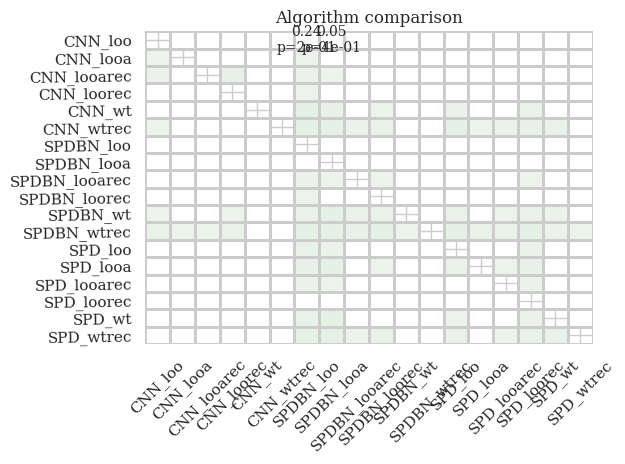

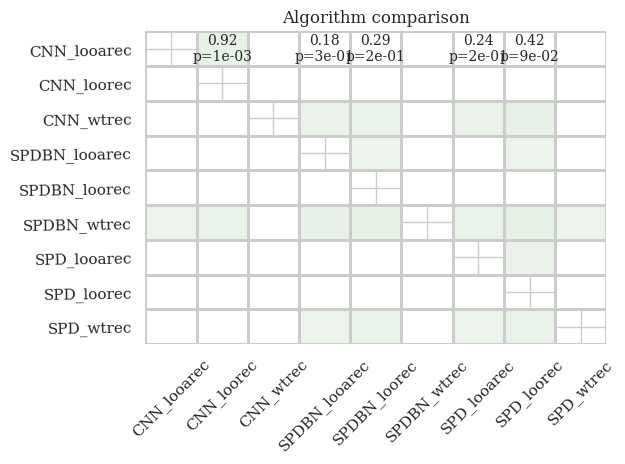

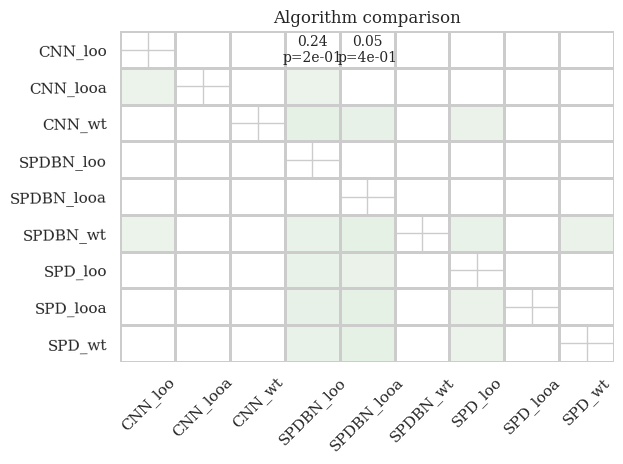

In [15]:
stats = compute_dataset_statistics(results_all)
P_all, T = find_significant_differences(stats)

moabb_plt.summary_plot(P_all, T)
plt.show()

stats = compute_dataset_statistics(results_rec)
P, T = find_significant_differences(stats)

moabb_plt.summary_plot(P, T)
plt.show()

stats = compute_dataset_statistics(results_nor)
P, T = find_significant_differences(stats)

moabb_plt.summary_plot(P, T)
plt.show()

In [16]:
P_all

,CNN_loo,CNN_looa,CNN_looarec,CNN_loorec,CNN_wt,CNN_wtrec,SPDBN_loo,SPDBN_looa,SPDBN_looarec,SPDBN_loorec,SPDBN_wt,SPDBN_wtrec,SPD_loo,SPD_looa,SPD_looarec,SPD_loorec,SPD_wt,SPD_wtrec
CNN_loo,NaN,0.951172,0.989502,0.696533,0.921143,0.956299,0.206055,0.432617,0.758057,0.675049,0.957275,0.996582,0.734375,0.884277,0.733398,0.561768,0.817383,0.947510
CNN_looa,0.048584,NaN,0.825439,0.082031,0.655029,0.767822,0.036133,0.065430,0.382568,0.244141,0.784912,0.970215,0.298096,0.590332,0.321289,0.149414,0.525879,0.733643
CNN_looarec,0.010498,0.173340,NaN,0.001221,0.606445,0.713623,0.016602,0.030518,0.279297,0.170654,0.730225,0.970947,0.206299,0.506348,0.208496,0.086426,0.455078,0.670166
CNN_loorec,0.301025,0.917969,0.998779,NaN,0.779053,0.943115,0.042480,0.075684,0.542236,0.348633,0.960693,0.997803,0.407959,0.765137,0.462646,0.187744,0.636963,0.930420
CNN_wt,0.078857,0.344971,0.393555,0.220947,NaN,0.756104,0.000244,0.000732,0.099365,0.023682,0.738770,0.946533,0.010254,0.247803,0.066895,0.004150,0.184570,0.716797
CNN_wtrec,0.043701,0.232422,0.285889,0.056396,0.243652,NaN,0.000244,0.000244,0.013916,0.006592,0.506836,0.947510,0.000488,0.034180,0.014893,0.000732,0.004150,0.378662
SPDBN_loo,0.794189,0.964111,0.983398,0.957520,0.999756,0.999756,NaN,0.854004,0.989014,0.959717,0.998535,0.999756,0.997314,0.999512,0.991455,0.940674,0.998535,0.999756
SPDBN_looa,0.567627,0.934814,0.969727,0.924072,0.999512,0.999756,0.145996,NaN,0.975342,0.883789,0.999756,0.999756,0.987305,0.999756,0.979248,0.772217,0.999756,0.999756
SPDBN_looarec,0.242188,0.617188,0.720947,0.457520,0.900635,0.986328,0.011230,0.024658,NaN,0.044189,0.991943,0.999023,0.260742,0.866211,0.366455,0.030273,0.765381,0.979248
SPDBN_loorec,0.325195,0.755859,0.829102,0.651611,0.976562,0.993652,0.040039,0.116455,0.956055,NaN,0.996094,0.999756,0.628662,0.961914,0.740723,0.129150,0.921143,0.994873


### get the interresting p-value

In [17]:


p_values_by_sort_nor = [P_all.iloc[4,0],P_all.iloc[4,1],P_all.iloc[1,0],
                    P_all.iloc[16,12],P_all.iloc[16,13],P_all.iloc[13,12],
                    P_all.iloc[10,6],P_all.iloc[10,7],P_all.iloc[7,6]]
p_values_by_sort_nor_sgf = [P_all.iloc[1,0],
                    P_all.iloc[16,12],P_all.iloc[13,12],
                    P_all.iloc[10,6],P_all.iloc[10,7]]


p_values_by_sort_rec = [P_all.iloc[5,3],P_all.iloc[5,2],P_all.iloc[2,3],
                    P_all.iloc[17,15],P_all.iloc[17,14],P_all.iloc[14,15],
                    P_all.iloc[11,9],P_all.iloc[11,8],P_all.iloc[8,9]]
p_values_by_sort_rec_sgf = [P_all.iloc[2,3],
                    P_all.iloc[17,15],P_all.iloc[17,14],P_all.iloc[14,15],
                    P_all.iloc[11,9],P_all.iloc[11,8],P_all.iloc[8,9]]


### Graph

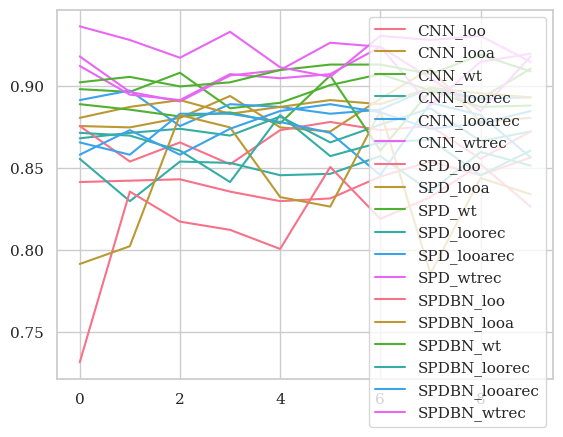

In [141]:
plt.figure()

for i,n in enumerate(names):
    plt.plot([np.mean(model_scores[i][k*12:(k+1)*12]) for k in range(10)],label=n)

plt.legend()
plt.show()

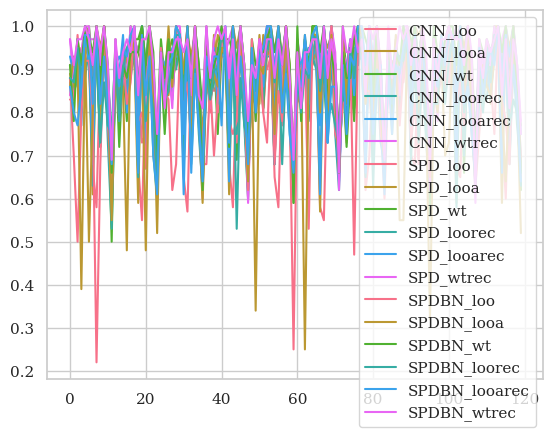

In [142]:
plt.figure()

for i,n in enumerate(names):
    plt.plot(model_scores[i],label=n)

plt.legend()
plt.show()

In [18]:
box_pairs_nor = [(("CNN", "CNN_wt"), ("CNN", "CNN_loo")),
                                 (("CNN", "CNN_wt"), ("CNN", "CNN_looa")),
                                 (("CNN", "CNN_looa"), ("CNN", "CNN_loo")),
                                 (("SPD", "SPD_wt"), ("SPD", "SPD_loo")),
                                 (("SPD", "SPD_looa"), ("SPD", "SPD_loo")),
                                 (("SPDBN", "SPDBN_wt"), ("SPDBN", "SPDBN_loo")),
                                 (("SPDBN", "SPDBN_wt"), ("SPDBN", "SPDBN_looa")),
                                 (("SPDBN", "SPDBN_looa"), ("SPDBN", "SPDBN_loo")),
                                ]
box_pairs_nor_sgf = [(("CNN", "CNN_looa"), ("CNN", "CNN_loo")),
                                 (("SPD", "SPD_wt"), ("SPD", "SPD_loo")),
                                 (("SPD", "SPD_looa"), ("SPD", "SPD_loo")),
                                 (("SPDBN", "SPDBN_wt"), ("SPDBN", "SPDBN_loo")),
                                 (("SPDBN", "SPDBN_wt"), ("SPDBN", "SPDBN_looa")),
                                ]

box_pairs_rec = [(("CNN", "CNN_wtrec"), ("CNN", "CNN_loorec")),
                                 (("CNN", "CNN_wtrec"), ("CNN", "CNN_looarec")),
                                 (("CNN", "CNN_looarec"), ("CNN", "CNN_loorec")),
                                 (("SPD", "SPD_wtrec"), ("SPD", "SPD_loorec")),
                                 (("SPD", "SPD_wtrec"), ("SPD", "SPD_looarec")),
                                 (("SPD", "SPD_looarec"), ("SPD", "SPD_loorec")),
                                 (("SPDBN", "SPDBN_wtrec"), ("SPDBN", "SPDBN_loorec")),
                                 (("SPDBN", "SPDBN_wtrec"), ("SPDBN", "SPDBN_looarec")),
                                 (("SPDBN", "SPDBN_looarec"), ("SPDBN", "SPDBN_loorec")),
                                ]
box_pairs_rec_sgf = [(("CNN", "CNN_looarec"), ("CNN", "CNN_loorec")),
                                 (("SPD", "SPD_wtrec"), ("SPD", "SPD_loorec")),
                                 (("SPD", "SPD_wtrec"), ("SPD", "SPD_looarec")),
                                 (("SPD", "SPD_looarec"), ("SPD", "SPD_loorec")),
                                 (("SPDBN", "SPDBN_wtrec"), ("SPDBN", "SPDBN_loorec")),
                                 (("SPDBN", "SPDBN_wtrec"), ("SPDBN", "SPDBN_looarec")),
                                 (("SPDBN", "SPDBN_looarec"), ("SPDBN", "SPDBN_loorec")),
                                ]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CNN_CNN_loo v.s. CNN_CNN_looa: Custom statistical test, P_val:4.858e-02
SPD_SPD_loo v.s. SPD_SPD_looa: Custom statistical test, P_val:9.277e-03
SPDBN_SPDBN_looa v.s. SPDBN_SPDBN_wt: Custom statistical test, P_val:4.883e-04
SPD_SPD_loo v.s. SPD_SPD_wt: Custom statistical test, P_val:4.028e-02
SPDBN_SPDBN_loo v.s. SPDBN_SPDBN_wt: Custom statistical test, P_val:1.709e-03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CNN_CNN_loorec v.s. CNN_CNN_looarec: Custom statistical test, P_val:1.221e-03
SPD_SPD_loorec v.s. SPD_SPD_looarec: Custom statistical test, P_val:1.636e-02
SPD_SPD_looarec v.s. SPD_SPD_wtrec: Custom statistical test, P_val:2.710e-02
SPDBN_SPDBN_looarec v.s. SPDBN_SPDBN_wtrec: Custom statistical test,

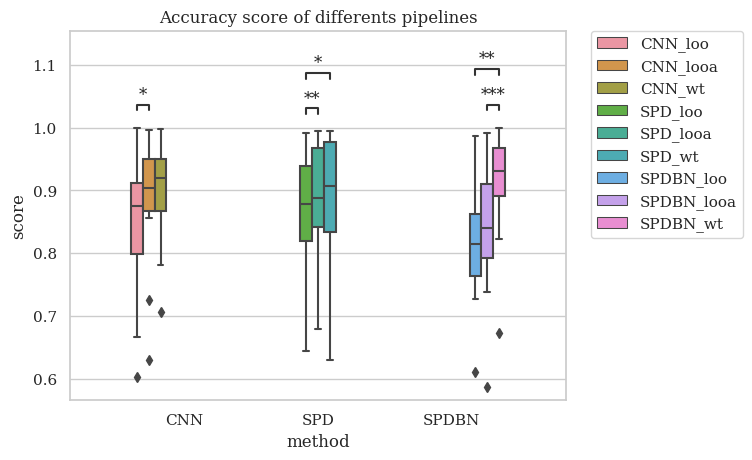

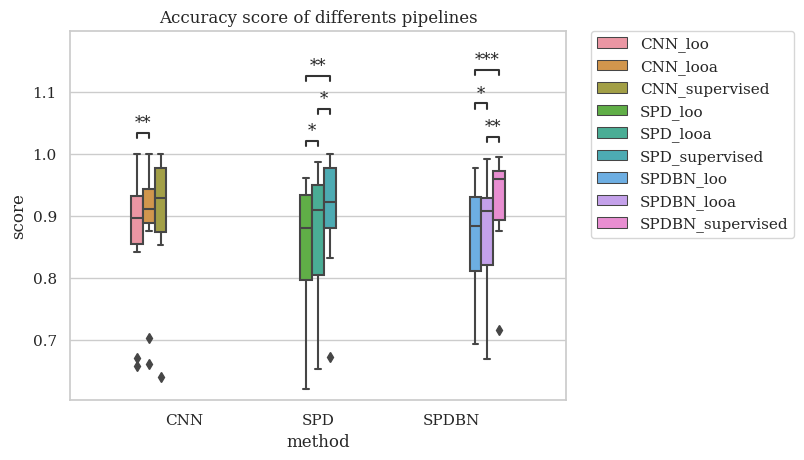

In [29]:
x = "method"
y = "score"
hue = "pipeline"

fig1 = plt.figure(1)
ax = sns.boxplot(data=results_nor, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=results_nor, x=x, y=y, hue=hue,
                    box_pairs=box_pairs_nor_sgf,
                    pvalues=p_values_by_sort_nor_sgf,
                    perform_stat_test=False, text_format='star', loc='inside', verbose=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Accuracy score of differents pipelines")


temp = results_rec.copy()
temp.insert(1,"pipeline_renamed",np.repeat(["CNN_loo","CNN_looa","CNN_supervised","SPD_loo","SPD_looa","SPD_supervised","SPDBN_loo","SPDBN_looa","SPDBN_supervised"],12),True)

fig2 = plt.figure(2)
ax = sns.boxplot(data=temp, x=x, y=y, hue="pipeline_renamed")
add_stat_annotation(ax, data=temp, x=x, y=y, hue=hue,
                    box_pairs=box_pairs_rec_sgf,
                    pvalues=p_values_by_sort_rec_sgf,
                    perform_stat_test=False, text_format='star', loc='inside', verbose=2)
plt.title("Accuracy score of differents pipelines")
ax.texts[0].set
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

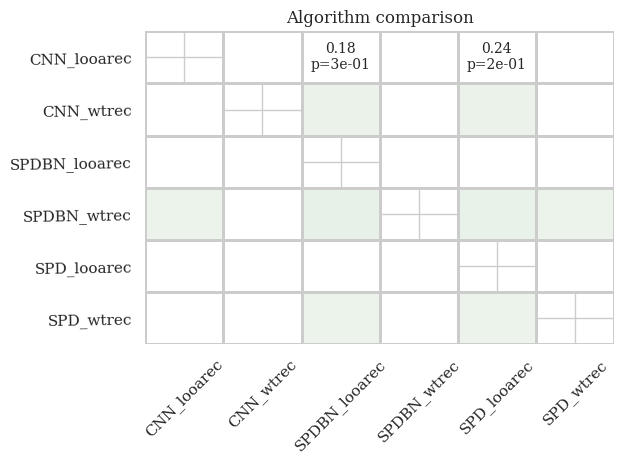

,CNN_looarec,CNN_wtrec,SPDBN_looarec,SPDBN_wtrec,SPD_looarec,SPD_wtrec
CNN_looarec,NaN,0.713623,0.279297,0.970947,0.208496,0.670166
CNN_wtrec,0.285889,NaN,0.013916,0.947510,0.014893,0.378662
SPDBN_looarec,0.720947,0.986328,NaN,0.999023,0.366455,0.979248
SPDBN_wtrec,0.029053,0.052002,0.001221,NaN,0.003418,0.039795
SPD_looarec,0.791016,0.985352,0.633301,0.996826,NaN,0.973145
SPD_wtrec,0.329346,0.619385,0.020996,0.959961,0.027100,NaN


In [62]:
best_results = results_rec.loc[results_rec['pipeline'].isin(["CNN_wtrec","SPD_looarec","SPDBN_wtrec","SPDBN_looarec","CNN_looarec","SPD_wtrec"])]
stats = compute_dataset_statistics(best_results)
P, T = find_significant_differences(stats)

moabb_plt.summary_plot(P, T)
plt.show()
P

## tps_ test

In [73]:
CNN_loo_v = np.concatenate(CNN_loo_tst.values)
CNN_looa_v = np.concatenate(CNN_looa_tst.values)
CNN_wt_v = np.concatenate(CNN_wt_tst.values)
CNN_loorec_v = np.concatenate(CNN_loorec_tst.values)
CNN_looarec_v = np.concatenate(CNN_looarec_tst.values)
CNN_wtrec_v = np.concatenate(CNN_wtrec_tst.values)

SPD_loo_v = np.concatenate(SPD_loo_tst.values)
SPD_looa_v = np.concatenate(SPD_looa_tst.values)
SPD_wt_v = np.concatenate(SPD_wt_tst.values)
SPD_loorec_v = np.concatenate(SPD_loorec_tst.values)
SPD_looarec_v = np.concatenate(SPD_looarec_tst.values)
SPD_wtrec_v = np.concatenate(SPD_wtrec_tst.values)

SPDBN_loo_v = np.concatenate(SPDBN_loo_tst.values)
SPDBN_looa_v = np.concatenate(SPDBN_looa_tst.values)
SPDBN_wt_v = np.concatenate(SPDBN_wt_tst.values)
SPDBN_loorec_v = np.concatenate(SPDBN_loorec_tst.values)
SPDBN_looarec_v = np.concatenate(SPDBN_looarec_tst.values)
SPDBN_wtrec_v = np.concatenate(SPDBN_wtrec_tst.values)

n_train_loo = 26400
n_train_looa = 27040
n_train_wt = 1120

n_test_loo = 7020
n_test_looa = 5148
n_test_wt = 3744

In [74]:
CNN_loo_v_mean = CNN_loo_tst.mean(axis=0).values
CNN_looa_v_mean = CNN_looa_tst.mean(axis=0).values
CNN_wt_v_mean = CNN_wt_tst.mean(axis=0).values
CNN_loorec_v_mean = CNN_loorec_tst.mean(axis=0).values
CNN_looarec_v_mean = CNN_looarec_tst.mean(axis=0).values
CNN_wtrec_v_mean = CNN_wtrec_tst.mean(axis=0).values

SPD_loo_v_mean = SPD_loo_tst.mean(axis=0).values
SPD_looa_v_mean = SPD_looa_tst.mean(axis=0).values
SPD_wt_v_mean = SPD_wt_tst.mean(axis=0).values
SPD_loorec_v_mean = SPD_loorec_tst.mean(axis=0).values
SPD_looarec_v_mean = SPD_looarec_tst.mean(axis=0).values
SPD_wtrec_v_mean = SPD_wtrec_tst.mean(axis=0).values

SPDBN_loo_v_mean = SPDBN_loo_tst.mean(axis=0).values
SPDBN_looa_v_mean = SPDBN_looa_tst.mean(axis=0).values
SPDBN_wt_v_mean = SPDBN_wt_tst.mean(axis=0).values
SPDBN_loorec_v_mean = SPDBN_loorec_tst.mean(axis=0).values
SPDBN_looarec_v_mean = SPDBN_looarec_tst.mean(axis=0).values
SPDBN_wtrec_v_mean = SPDBN_wtrec_tst.mean(axis=0).values

In [75]:
model_scores = [CNN_loo_v,CNN_looa_v,CNN_wt_v,CNN_loorec_v,CNN_looarec_v,CNN_wtrec_v,
                SPD_loo_v,SPD_looa_v,SPD_wt_v,SPD_loorec_v,SPD_looarec_v,SPD_wtrec_v,
                SPDBN_loo_v,SPDBN_looa_v,SPDBN_wt_v,SPDBN_loorec_v,SPDBN_looarec_v,SPDBN_wtrec_v
                ]
model_scores_mean = [CNN_loo_v_mean,CNN_looa_v_mean,CNN_wt_v_mean,CNN_loorec_v_mean,CNN_looarec_v_mean,CNN_wtrec_v_mean,
                     SPD_loo_v_mean,SPD_looa_v_mean,SPD_wt_v_mean,SPD_loorec_v_mean,SPD_looarec_v_mean,SPD_wtrec_v_mean,
                     SPDBN_loo_v_mean,SPDBN_looa_v_mean,SPDBN_wt_v_mean,SPDBN_loorec_v_mean,SPDBN_looarec_v_mean,SPDBN_wtrec_v_mean
                     ]
names = ["CNN_loo","CNN_looa","CNN_wt","CNN_loorec","CNN_looarec","CNN_wtrec",
         "SPD_loo","SPD_looa","SPD_wt","SPD_loorec","SPD_looarec","SPD_wtrec",
         "SPDBN_loo","SPDBN_looa","SPDBN_wt","SPDBN_loorec","SPDBN_looarec","SPDBN_wtrec"
         ]
list_n_train = [n_train_loo,n_train_looa,n_train_wt,n_train_loo,n_train_looa,n_train_wt,n_train_loo,n_train_looa,n_train_wt,
                n_train_loo,n_train_looa,n_train_wt,n_train_loo,n_train_looa,n_train_wt,n_train_loo,n_train_looa,n_train_wt]
list_n_test = [n_test_loo,n_test_looa,n_test_wt,n_test_loo,n_test_looa,n_test_wt,n_test_loo,n_test_looa,n_test_wt,
               n_test_loo,n_test_looa,n_test_wt,n_test_loo,n_test_looa,n_test_wt,n_test_loo,n_test_looa,n_test_wt]

### Through MOABB

In [76]:
results_all = pd.DataFrame()
results_rec = pd.DataFrame()
results_nor = pd.DataFrame()


for i, score in enumerate(model_scores_mean):
    for k, sub_score in enumerate(score):
        new_row = {"dataset":"BurstVEP","subject":k,"session":1,"score":score[k],
                   "n_samples":list_n_train[i],"n_channels":32,"pipeline":names[i],"method":names[i].split("_")[0]}
        results = results.append(new_row, ignore_index=True)
        if (i//3) % 2 == 0:
            results_nor = results_nor.append(new_row, ignore_index=True)
        else:
            results_rec = results_rec.append(new_row, ignore_index=True)

C:\Users\s.velut\AppData\Local\Temp\ipykernel_17920\2527697337.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_17920\2527697337.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_nor = results_nor.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_17920\2527697337.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_17920\2527697337.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_nor =

In [77]:
results

,dataset,subject,session,score,n_samples,n_channels,pipeline,method
0,BurstVEP,0,1,0.874,26400,32,CNN_loo,CNN
1,BurstVEP,1,1,0.874,26400,32,CNN_loo,CNN
2,BurstVEP,2,1,0.875,26400,32,CNN_loo,CNN
3,BurstVEP,3,1,0.903,26400,32,CNN_loo,CNN
4,BurstVEP,4,1,0.911,26400,32,CNN_loo,CNN
...,...,...,...,...,...,...,...,...
643,BurstVEP,7,1,0.979,1120,32,SPDBN_wtrec,SPDBN
644,BurstVEP,8,1,0.895,1120,32,SPDBN_wtrec,SPDBN
645,BurstVEP,9,1,0.994,1120,32,SPDBN_wtrec,SPDBN
646,BurstVEP,10,1,0.903,1120,32,SPDBN_wtrec,SPDBN


In [ ]:
fig1 = moabb_plt.paired_plot(results, "CNN_loo", "CNN_wt")
fig2 = moabb_plt.paired_plot(results, "CNN_looa", "CNN_wt")
fig3 = moabb_plt.paired_plot(results, "SPD_wt", "CNN_wt")
fig1 = moabb_plt.paired_plot(results, "SPD_loo", "SPD_wt")
fig2 = moabb_plt.paired_plot(results, "SPD_looa", "SPD_wt")
fig3 = moabb_plt.paired_plot(results, "SPD_wt", "SPDBN_wt")
fig2 = moabb_plt.paired_plot(results, "SPDBN_looa", "SPDBN_wt")
fig3 = moabb_plt.paired_plot(results, "SPDBN_loo", "SPDBN_wt")
plt.show()

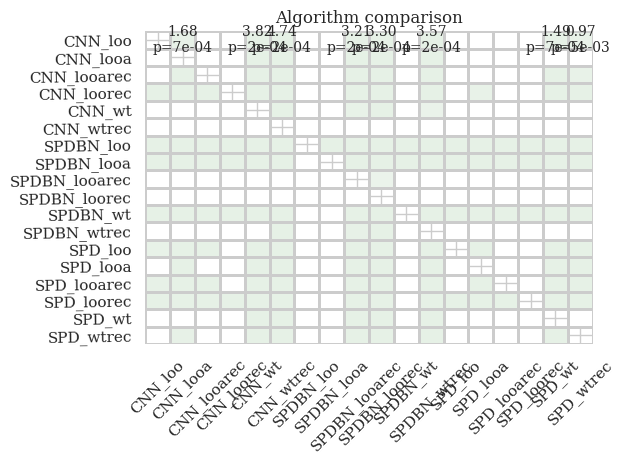

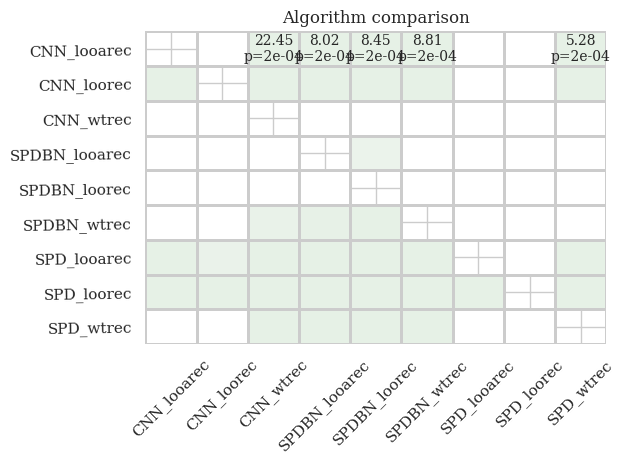

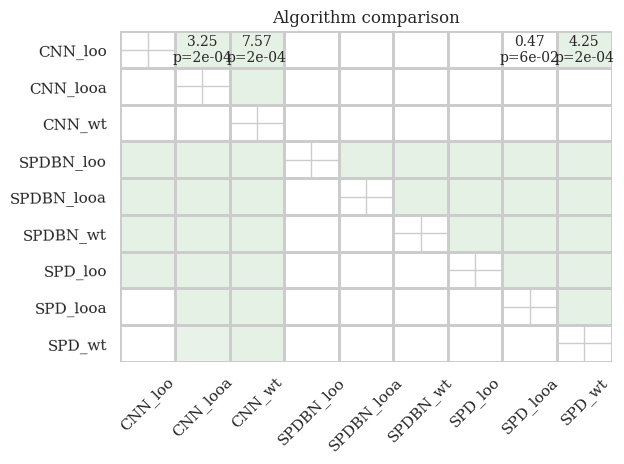

In [82]:
stats = compute_dataset_statistics(results)
P_all, T_all = find_significant_differences(stats)

moabb_plt.summary_plot(P_all, T_all)
plt.show()

stats = compute_dataset_statistics(results_rec)
P, T = find_significant_differences(stats)

moabb_plt.summary_plot(P, T)
plt.show()

stats = compute_dataset_statistics(results_nor)
P, T = find_significant_differences(stats)

moabb_plt.summary_plot(P, T)
plt.show()

In [98]:
P_all = P_all.transpose()

In [99]:
p_values_by_sort_nor = [P_all.iloc[4,0],P_all.iloc[4,1],P_all.iloc[1,0],
                    P_all.iloc[16,12],P_all.iloc[16,13],P_all.iloc[13,12],
                    P_all.iloc[10,6],P_all.iloc[10,7],P_all.iloc[7,6]]
p_values_by_sort_nor_sgf = [P_all.iloc[1,0],
                    P_all.iloc[16,12],P_all.iloc[13,12],
                    P_all.iloc[10,6],P_all.iloc[10,7]]


p_values_by_sort_rec = [P_all.iloc[5,3],P_all.iloc[5,2],P_all.iloc[2,3],
                    P_all.iloc[17,15],P_all.iloc[17,14],P_all.iloc[14,15],
                    P_all.iloc[11,9],P_all.iloc[11,8],P_all.iloc[8,9]]
p_values_by_sort_rec_sgf = [P_all.iloc[2,3],
                    P_all.iloc[17,15],P_all.iloc[17,14],P_all.iloc[14,15],
                    P_all.iloc[11,9],P_all.iloc[11,8],P_all.iloc[8,9]]


### Graph

In [100]:
box_pairs_nor = [(("CNN", "CNN_wt"), ("CNN", "CNN_loo")),
                                 (("CNN", "CNN_wt"), ("CNN", "CNN_looa")),
                                 (("CNN", "CNN_looa"), ("CNN", "CNN_loo")),
                                 (("SPD", "SPD_wt"), ("SPD", "SPD_loo")),
                                 (("SPD", "SPD_wt"), ("SPD", "SPD_looa")),
                                 (("SPD", "SPD_looa"), ("SPD", "SPD_loo")),
                                 (("SPDBN", "SPDBN_wt"), ("SPDBN", "SPDBN_loo")),
                                 (("SPDBN", "SPDBN_wt"), ("SPDBN", "SPDBN_looa")),
                                 (("SPDBN", "SPDBN_looa"), ("SPDBN", "SPDBN_loo")),
                                ]
box_pairs_nor_sgf = [(("CNN", "CNN_looa"), ("CNN", "CNN_loo")),
                                 (("SPD", "SPD_wt"), ("SPD", "SPD_loo")),
                                 (("SPD", "SPD_looa"), ("SPD", "SPD_loo")),
                                 (("SPDBN", "SPDBN_wt"), ("SPDBN", "SPDBN_loo")),
                                 (("SPDBN", "SPDBN_wt"), ("SPDBN", "SPDBN_looa")),
                                ]

box_pairs_rec = [(("CNN", "CNN_wtrec"), ("CNN", "CNN_loorec")),
                                 (("CNN", "CNN_wtrec"), ("CNN", "CNN_looarec")),
                                 (("CNN", "CNN_looarec"), ("CNN", "CNN_loorec")),
                                 (("SPD", "SPD_wtrec"), ("SPD", "SPD_loorec")),
                                 (("SPD", "SPD_wtrec"), ("SPD", "SPD_looarec")),
                                 (("SPD", "SPD_looarec"), ("SPD", "SPD_loorec")),
                                 (("SPDBN", "SPDBN_wtrec"), ("SPDBN", "SPDBN_loorec")),
                                 (("SPDBN", "SPDBN_wtrec"), ("SPDBN", "SPDBN_looarec")),
                                 (("SPDBN", "SPDBN_looarec"), ("SPDBN", "SPDBN_loorec")),
                                ]
box_pairs_rec_sgf = [(("CNN", "CNN_looarec"), ("CNN", "CNN_loorec")),
                                 (("SPD", "SPD_wtrec"), ("SPD", "SPD_loorec")),
                                 (("SPD", "SPD_wtrec"), ("SPD", "SPD_looarec")),
                                 (("SPD", "SPD_looarec"), ("SPD", "SPD_loorec")),
                                 (("SPDBN", "SPDBN_wtrec"), ("SPDBN", "SPDBN_loorec")),
                                 (("SPDBN", "SPDBN_wtrec"), ("SPDBN", "SPDBN_looarec")),
                                 (("SPDBN", "SPDBN_looarec"), ("SPDBN", "SPDBN_loorec")),
                                ]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CNN_CNN_looa v.s. CNN_CNN_wt: Custom statistical test, P_val:4.883e-04
CNN_CNN_loo v.s. CNN_CNN_looa: Custom statistical test, P_val:7.324e-04
SPD_SPD_loo v.s. SPD_SPD_looa: Custom statistical test, P_val:2.441e-04
SPD_SPD_looa v.s. SPD_SPD_wt: Custom statistical test, P_val:2.441e-04
SPDBN_SPDBN_looa v.s. SPDBN_SPDBN_wt: Custom statistical test, P_val:2.441e-04
SPDBN_SPDBN_loo v.s. SPDBN_SPDBN_looa: Custom statistical test, P_val:2.441e-04
CNN_CNN_loo v.s. CNN_CNN_wt: Custom statistical test, P_val:2.441e-04
SPD_SPD_loo v.s. SPD_SPD_wt: Custom statistical test, P_val:2.441e-04
SPDBN_SPDBN_loo v.s. SPDBN_SPDBN_wt: Custom statistical test, P_val:2.441e-04
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CNN_CNN_l

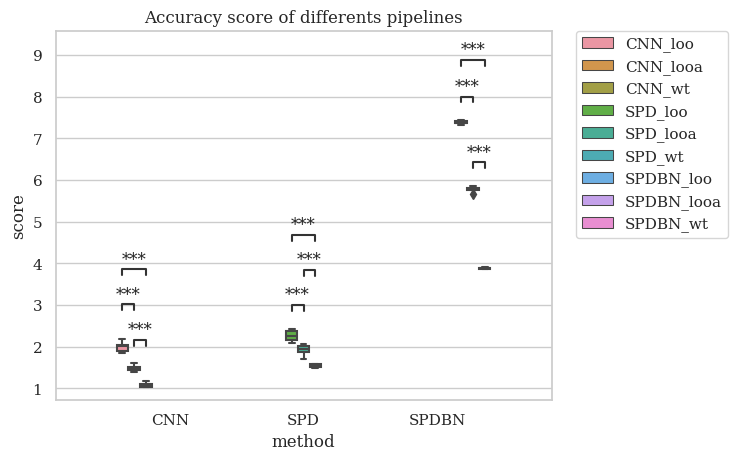

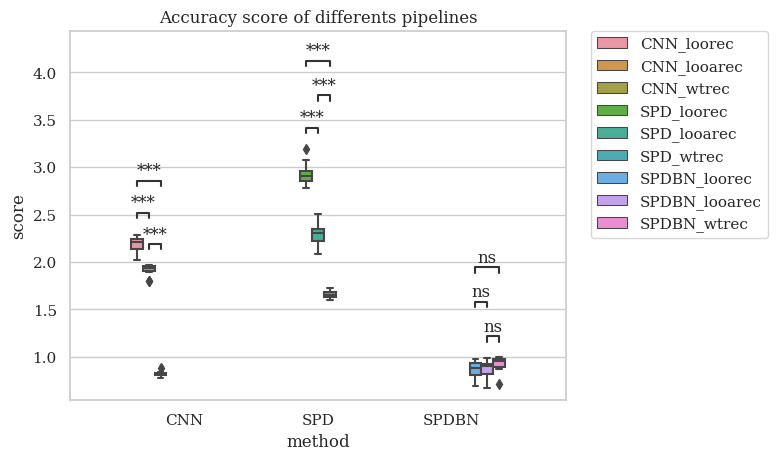

In [101]:
x = "method"
y = "score"
hue = "pipeline"

fig1 = plt.figure(1)
ax = sns.boxplot(data=results_nor, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=results_nor, x=x, y=y, hue=hue,
                    box_pairs=box_pairs_nor,
                    pvalues=p_values_by_sort_nor,
                    perform_stat_test=False, text_format='star', loc='inside', verbose=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Accuracy score of differents pipelines")

fig2 = plt.figure(2)
ax = sns.boxplot(data=results_rec, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=results_rec, x=x, y=y, hue=hue,
                    box_pairs=box_pairs_rec,
                    pvalues=p_values_by_sort_rec,
                    perform_stat_test=False, text_format='star', loc='inside', verbose=2)
plt.title("Accuracy score of differents pipelines")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## All in one

In [121]:
from itertools import combinations
from math import factorial

n_comparisons = factorial(len(model_scores)) / (
    factorial(2) * factorial(len(model_scores) - 2)
)
pairwise_t_test = []

for model_i, model_k in combinations(range(len(model_scores)), 2):
    model_i_scores = model_scores[model_i]
    model_k_scores = model_scores[model_k]
    differences = model_i_scores - model_k_scores

    n = differences.shape[0]  # number of test sets
    df = n - 1

    n_train = int((list_n_train[model_i] + list_n_train[model_k])/2)
    n_test = int((list_n_test[model_i] + list_n_test[model_k])/2)

    t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
    # p_val *= n_comparisons  # implement Bonferroni correction
    # # Bonferroni can output p-values higher than 1
    p_val = 1 if p_val > 1 else p_val
    pairwise_t_test.append(
        [names[model_i], names[model_k], t_stat, p_val]
    )

pairwise_comp_df = pd.DataFrame(
    pairwise_t_test, columns=["model_1", "model_2", "t_stat", "p_val"]
).round(3)
pairwise_comp_df

,model_1,model_2,t_stat,p_val
0,CNN_loo,CNN_looa,-0.733,0.232
1,CNN_loo,CNN_wt,-0.706,0.241
2,CNN_loo,SPD_loo,-0.375,0.354
3,CNN_loo,SPD_looa,-0.777,0.219
4,CNN_loo,SPD_wt,-0.473,0.319
5,CNN_loo,SPDBN_loo,0.333,0.370
6,CNN_loo,SPDBN_looa,0.076,0.470
7,CNN_loo,SPDBN_wt,-0.785,0.217
8,CNN_looa,CNN_wt,-0.225,0.411
9,CNN_looa,SPD_loo,0.305,0.380


In [142]:
from itertools import combinations
from math import factorial

n_comparisons = factorial(len(model_scores)) / (
    factorial(2) * factorial(len(model_scores) - 2)
)
pairwise_t_test = []

for model_i, model_k in combinations(range(len(model_scores)), 2):
    model_i_scores = model_scores[model_i]
    model_k_scores = model_scores[model_k]
    differences = model_i_scores - model_k_scores

    n = differences.shape[0]  # number of test sets
    df = n - 1

    n_train = int((list_n_train[model_i] + list_n_train[model_k])/2)
    n_test = int((list_n_test[model_i] + list_n_test[model_k])/2)

    t_stat, p_val = scipy.stats.ttest_ind(model_i_scores,model_k_scores,equal_var=False)
    # p_val *= n_comparisons  # implement Bonferroni correction
    # Bonferroni can output p-values higher than 1
    p_val = 1 if p_val > 1 else p_val
    pairwise_t_test.append(
        [names[model_i], names[model_k], t_stat, p_val]
    )

pairwise_comp_df = pd.DataFrame(
    pairwise_t_test, columns=["model_1", "model_2", "t_stat", "p_val"]
).round(3)
pairwise_comp_df

,model_1,model_2,t_stat,p_val
0,CNN_loo,CNN_looa,-2.810,0.005
1,CNN_loo,CNN_wt,-4.156,0.000
2,CNN_loo,CNN_loorec,-2.115,0.035
3,CNN_loo,CNN_looarec,-3.289,0.001
4,CNN_loo,CNN_wtrec,-4.642,0.000
...,...,...,...,...
100,SPD_wtrec,SPDBN_looa,4.151,0.000
101,SPD_wtrec,SPDBN_wt,-0.137,0.891
102,SPDBN_loo,SPDBN_looa,-0.923,0.357
103,SPDBN_loo,SPDBN_wt,-5.845,0.000


In [145]:
p_scores = np.ones((15,15))
start_idx = 0
for k in range(15,0,-1):
    p_scores[15-k,15-k+1:] = pairwise_comp_df.iloc[start_idx:start_idx+k-1,3]
    start_idx += k-1

p_scores = p_scores.transpose()
p_scores

array([[1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   , 1.   ],
       [0.005, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   , 1.   ],
       [0.   , 0.232, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   , 1.   ],
       [0.035, 0.464, 0.047, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   , 1.   ],
       [0.001, 0.659, 0.455, 0.234, 1.   , 1.   , 1.   , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   , 1.   ],
       [0.   , 0.068, 0.453, 0.01 , 0.157, 1.   , 1.   , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   , 1.   ],
       [0.082, 0.249, 0.014, 0.679, 0.104, 0.002, 1.   , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   , 1.   ],
       [0.001, 0.618, 0.446, 0.198, 0.974, 0.143, 0.08 , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   , 1.   ],
       [0.004, 0.868, 0.

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:262: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


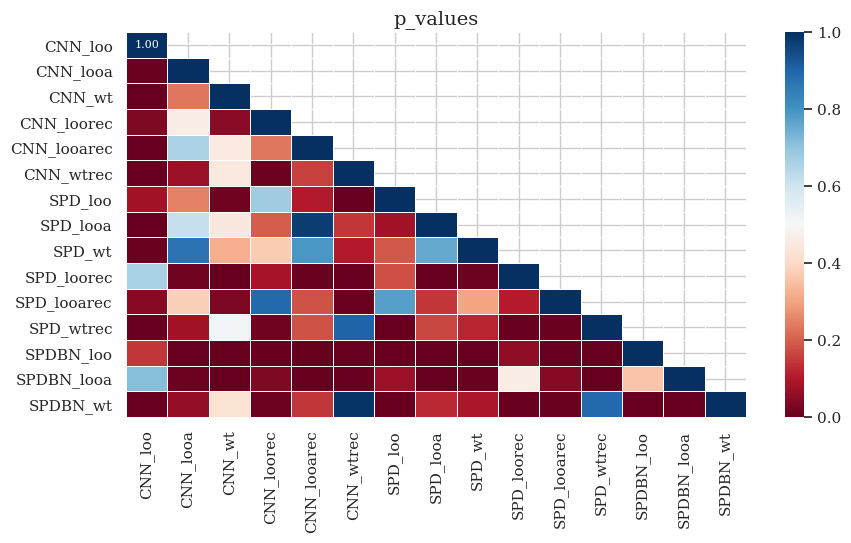

In [146]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title("p_values", fontsize=14)

mask = np.zeros_like(p_scores, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

# Generate the heatmap including the mask
heatmap = sns.heatmap(p_scores,
                      annot=True,
                      annot_kws={"fontsize": 8},
                      fmt='.2f',
                      linewidths=0.5,
                      cmap='RdBu',
                      mask=mask, # the mask has been included here
                      xticklabels=names,
                      yticklabels=names,
                      ax=ax)

# Display our plot
plt.show()

## test WT CNN / SPD

In [58]:
differences = CNN_wt_v - SPD_wt_v

n = differences.shape[0]  # number of test sets
df = n - 1

n_train = n_train_wt
n_test = n_test_wt

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: 0.103
Corrected p-value: 0.459


In [59]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1) / n)
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)

print(
    f"Uncorrected t-value: {t_stat_uncorrected:.3f}\n"
    f"Uncorrected p-value: {p_val_uncorrected:.3f}"
)
scipy.stats.ttest_ind(CNN_wt_v,SPD_wt_v,equal_var=False)


Uncorrected t-value: 2.066
Uncorrected p-value: 0.020


Ttest_indResult(statistic=1.0021328518901647, pvalue=0.3173364892726997)

## test LOO CNN / SPD

In [60]:
differences = CNN_loo_v - SPD_loo_v

n = differences.shape[0]  # number of test sets
df = n - 1

n_train = n_train_loo
n_test = n_test_loo

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: -0.375
Corrected p-value: 0.354


In [61]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1) / n)
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)

print(
    f"Uncorrected t-value: {t_stat_uncorrected:.3f}\n"
    f"Uncorrected p-value: {p_val_uncorrected:.3f}"
)
scipy.stats.ttest_ind(CNN_loo_v,SPD_loo_v,equal_var=False)


Uncorrected t-value: -2.153
Uncorrected p-value: 0.017


Ttest_indResult(statistic=-1.7448060172939428, pvalue=0.08232743328844182)

## test LOOA CNN / SPD

In [62]:
differences = CNN_looa_v - SPD_looa_v

n = differences.shape[0]  # number of test sets
df = n - 1

n_train = n_train_looa
n_test = n_test_looa

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: -0.160
Corrected p-value: 0.436


In [63]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1) / n)
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)

print(
    f"Uncorrected t-value: {t_stat_uncorrected:.3f}\n"
    f"Uncorrected p-value: {p_val_uncorrected:.3f}"
)
scipy.stats.ttest_ind(CNN_looa_v,SPD_looa_v,equal_var=False)

Uncorrected t-value: -0.784
Uncorrected p-value: 0.217


Ttest_indResult(statistic=-0.49871633980158486, pvalue=0.6184523377337583)

## test WT CNN / SPDBN

In [64]:
differences = CNN_wt_v - SPDBN_wt_v

n = differences.shape[0]  # number of test sets
df = n - 1

n_train = n_train_wt
n_test = n_test_wt

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: -0.071
Corrected p-value: 0.472


In [65]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1) / n)
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)

print(
    f"Uncorrected t-value: {t_stat_uncorrected:.3f}\n"
    f"Uncorrected p-value: {p_val_uncorrected:.3f}"
)
scipy.stats.ttest_ind(CNN_wt_v,SPDBN_wt_v,equal_var=False)


Uncorrected t-value: -1.421
Uncorrected p-value: 0.079


Ttest_indResult(statistic=-0.792722147644561, pvalue=0.4287305977010901)

## test LOO CNN / SPDBN

In [66]:
differences = CNN_loo_v - SPDBN_loo_v

n = differences.shape[0]  # number of test sets
df = n - 1

n_train = n_train_loo
n_test = n_test_loo

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: 0.333
Corrected p-value: 0.370


In [67]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1) / n)
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)

print(
    f"Uncorrected t-value: {t_stat_uncorrected:.3f}\n"
    f"Uncorrected p-value: {p_val_uncorrected:.3f}"
)
scipy.stats.ttest_ind(CNN_loo_v,SPDBN_loo_v,equal_var=False)


Uncorrected t-value: 1.908
Uncorrected p-value: 0.029


Ttest_indResult(statistic=1.4717858681179092, pvalue=0.14244123942633424)

## test LOOA CNN / SPDBN

In [68]:
differences = CNN_looa_v - SPDBN_looa_v

n = differences.shape[0]  # number of test sets
df = n - 1

n_train = n_train_looa
n_test = n_test_looa

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: 0.670
Corrected p-value: 0.252


In [69]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1) / n)
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)

print(
    f"Uncorrected t-value: {t_stat_uncorrected:.3f}\n"
    f"Uncorrected p-value: {p_val_uncorrected:.3f}"
)
scipy.stats.ttest_ind(CNN_looa_v,SPDBN_looa_v,equal_var=False)

Uncorrected t-value: 3.273
Uncorrected p-value: 0.001


Ttest_indResult(statistic=2.6953646696186486, pvalue=0.007606903159761997)

## test WT SPDBN / SPD

In [70]:
differences = SPDBN_wt_v - SPD_wt_v

n = differences.shape[0]  # number of test sets
df = n - 1

n_train = n_train_wt
n_test = n_test_wt

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: 0.202
Corrected p-value: 0.420


In [71]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1) / n)
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)

print(
    f"Uncorrected t-value: {t_stat_uncorrected:.3f}\n"
    f"Uncorrected p-value: {p_val_uncorrected:.3f}"
)
scipy.stats.ttest_ind(SPDBN_wt_v,SPD_wt_v,equal_var=False)


Uncorrected t-value: 4.051
Uncorrected p-value: 0.000


Ttest_indResult(statistic=1.6984990387107397, pvalue=0.09075225889331986)

## test LOO SPDBN / SPD

In [72]:
differences = SPDBN_loo_v - SPD_loo_v

n = differences.shape[0]  # number of test sets
df = n - 1

n_train = n_train_loo
n_test = n_test_loo

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: -0.766
Corrected p-value: 0.222


In [73]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1) / n)
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)

print(
    f"Uncorrected t-value: {t_stat_uncorrected:.3f}\n"
    f"Uncorrected p-value: {p_val_uncorrected:.3f}"
)
scipy.stats.ttest_ind(SPDBN_loo_v,SPD_loo_v,equal_var=False)


Uncorrected t-value: -4.397
Uncorrected p-value: 0.000


Ttest_indResult(statistic=-3.1065157512724224, pvalue=0.0021427886034054394)

## test LOOA SPDBN / SPD

In [74]:
differences = SPDBN_looa_v - SPD_looa_v

n = differences.shape[0]  # number of test sets
df = n - 1

n_train = n_train_looa
n_test = n_test_looa

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: -0.930
Corrected p-value: 0.177


In [75]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1) / n)
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)

print(
    f"Uncorrected t-value: {t_stat_uncorrected:.3f}\n"
    f"Uncorrected p-value: {p_val_uncorrected:.3f}"
)
scipy.stats.ttest_ind(SPDBN_looa_v,SPD_looa_v,equal_var=False)

Uncorrected t-value: -4.543
Uncorrected p-value: 0.000


Ttest_indResult(statistic=-3.202195076606427, pvalue=0.0016013243814845344)

# Other

### score code

In [21]:
df0_wt = pd.read_csv("../results/score_code/SPDBN/SPDBN_WT_score_code_recentered_0.csv",index_col=0)
df1_wt = pd.read_csv("../results/score_code/SPDBN/SPDBN_WT_score_code_recentered_1.csv",index_col=0)
df2_wt = pd.read_csv("../results/score_code/SPDBN/SPDBN_WT_score_code_recentered_2.csv",index_col=0)
df3_wt = pd.read_csv("../results/score_code/SPDBN/SPDBN_WT_score_code_recentered_0.csv",index_col=0)
df4_wt = pd.read_csv("../results/score_code/SPDBN/SPDBN_WT_score_code_recentered_4.csv",index_col=0)
df5_wt = pd.read_csv("../results/score_code/SPDBN/SPDBN_WT_score_code_recentered_5.csv",index_col=0)
df6_wt = pd.read_csv("../results/score_code/SPDBN/SPDBN_WT_score_code_recentered_6.csv",index_col=0)
df7_wt = pd.read_csv("../results/score_code/SPDBN/SPDBN_WT_score_code_recentered_7.csv",index_col=0)
df8_wt = pd.read_csv("../results/score_code/SPDBN/SPDBN_WT_score_code_recentered_8.csv",index_col=0)
df9_wt = pd.read_csv("../results/score_code/SPDBN/SPDBN_WT_score_code_recentered_9.csv",index_col=0)
df10_wt = pd.read_csv("../results/score_code/SPDBN/SPDBN_WT_score_code_recentered_10.csv",index_col=0)
df11_wt = pd.read_csv("../results/score_code/SPDBN/SPDBN_WT_score_code_recentered_11.csv",index_col=0)

df0_loo = pd.read_csv("../results/score_code/SPDBN/SPDBN_LOO_score_code_recentered_0.csv",index_col=0)
df1_loo = pd.read_csv("../results/score_code/SPDBN/SPDBN_LOO_score_code_recentered_1.csv",index_col=0)
df2_loo = pd.read_csv("../results/score_code/SPDBN/SPDBN_LOO_score_code_recentered_2.csv",index_col=0)
df3_loo = pd.read_csv("../results/score_code/SPDBN/SPDBN_LOO_score_code_recentered_0.csv",index_col=0)
df4_loo = pd.read_csv("../results/score_code/SPDBN/SPDBN_LOO_score_code_recentered_4.csv",index_col=0)
df5_loo = pd.read_csv("../results/score_code/SPDBN/SPDBN_LOO_score_code_recentered_5.csv",index_col=0)
df6_loo = pd.read_csv("../results/score_code/SPDBN/SPDBN_LOO_score_code_recentered_6.csv",index_col=0)
df7_loo = pd.read_csv("../results/score_code/SPDBN/SPDBN_LOO_score_code_recentered_7.csv",index_col=0)
df8_loo = pd.read_csv("../results/score_code/SPDBN/SPDBN_LOO_score_code_recentered_8.csv",index_col=0)
df9_loo = pd.read_csv("../results/score_code/SPDBN/SPDBN_LOO_score_code_recentered_9.csv",index_col=0)
df10_loo = pd.read_csv("../results/score_code/SPDBN/SPDBN_LOO_score_code_recentered_10.csv",index_col=0)
df11_loo = pd.read_csv("../results/score_code/SPDBN/SPDBN_LOO_score_code_recentered_11.csv",index_col=0)

df0_looa = pd.read_csv("../results/score_code/SPDBN/SPDBN_LOOA_score_code_recentered_0.csv",index_col=0)
df1_looa = pd.read_csv("../results/score_code/SPDBN/SPDBN_LOOA_score_code_recentered_1.csv",index_col=0)
df2_looa = pd.read_csv("../results/score_code/SPDBN/SPDBN_LOOA_score_code_recentered_2.csv",index_col=0)
df3_looa = pd.read_csv("../results/score_code/SPDBN/SPDBN_LOOA_score_code_recentered_0.csv",index_col=0)
df4_looa = pd.read_csv("../results/score_code/SPDBN/SPDBN_LOOA_score_code_recentered_4.csv",index_col=0)
df5_looa = pd.read_csv("../results/score_code/SPDBN/SPDBN_LOOA_score_code_recentered_5.csv",index_col=0)
df6_looa = pd.read_csv("../results/score_code/SPDBN/SPDBN_LOOA_score_code_recentered_6.csv",index_col=0)
df7_looa = pd.read_csv("../results/score_code/SPDBN/SPDBN_LOOA_score_code_recentered_7.csv",index_col=0)
df8_looa = pd.read_csv("../results/score_code/SPDBN/SPDBN_LOOA_score_code_recentered_8.csv",index_col=0)
df9_looa = pd.read_csv("../results/score_code/SPDBN/SPDBN_LOOA_score_code_recentered_9.csv",index_col=0)
df10_looa = pd.read_csv("../results/score_code/SPDBN/SPDBN_LOOA_score_code_recentered_10.csv",index_col=0)
df11_looa = pd.read_csv("../results/score_code/SPDBN/SPDBN_LOOA_score_code_recentered_11.csv",index_col=0)

In [23]:
df_wt = pd.concat([df0_wt,df1_wt,df2_wt,df3_wt,df4_wt,df5_wt,df6_wt,df7_wt,df8_wt,df9_wt,df10_wt,df11_wt], axis=1, ignore_index=True)
df_loo = pd.concat([df0_loo,df1_loo,df2_loo,df3_loo,df4_loo,df5_loo,df6_loo,df7_loo,df8_loo,df9_loo,df10_loo,df11_loo], axis=1, ignore_index=True)
df_looa = pd.concat([df0_looa,df1_looa,df2_looa,df3_looa,df4_looa,df5_looa,df6_looa,df7_looa,df8_looa,df9_looa,df10_looa,df11_looa], axis=1, ignore_index=True)

print(df_wt.mean(axis=0).mean())
print(SPDBN_wt_sc.mean(axis=0).mean())

0.9238333333333334
0.9083333333333332


In [30]:
df_wt.rename({"0":"1","1":"2","2":"3","3":"4","4":"5","5":"6","6":"7","7":"8","8":"9","9":"10","10":"11"})
df_loo.rename({"0":"1","1":"2","2":"3","3":"4","4":"5","5":"6","6":"7","7":"8","8":"9","9":"10","10":"11"})
df_looa.rename({"0":"1","1":"2","2":"3","3":"4","4":"5","5":"6","6":"7","7":"8","8":"9","9":"10","10":"11"})
df_wt.to_csv("./results/score_code/SPDBN_WT_score_code_recentered.csv")
df_loo.to_csv("./results/score_code/SPDBN_LOO_score_code_recentered.csv")
df_looa.to_csv("./results/score_code/SPDBN_LOOA_score_code_recentered.csv")

In [26]:
print(df_loo.mean(axis=0))
print(SPDBN_loo_sc.mean(axis=0))

0     0.895
1     0.818
2     0.923
3     0.895
4     0.964
5     0.977
6     0.844
7     0.952
8     0.730
9     0.872
10    0.786
11    0.693
dtype: float64
1     0.854
2     0.834
3     0.860
4     0.737
5     0.873
6     0.969
7     0.797
8     0.773
9     0.728
10    0.986
11    0.793
12    0.612
dtype: float64


In [28]:
print(df_looa.mean(axis=0).mean())
print(SPDBN_looa_sc.mean(axis=0).mean())

0.8759166666666666
0.836


### tps test

In [68]:
df0_wt = pd.read_csv("../results/tps_test/SPDBN/SPDBN_WT_tps_test_recentered_0.csv",index_col=0)
df1_wt = pd.read_csv("../results/tps_test/SPDBN/SPDBN_WT_tps_test_recentered_1.csv",index_col=0)
df2_wt = pd.read_csv("../results/tps_test/SPDBN/SPDBN_WT_tps_test_recentered_2.csv",index_col=0)
df3_wt = pd.read_csv("../results/tps_test/SPDBN/SPDBN_WT_tps_test_recentered_0.csv",index_col=0)
df4_wt = pd.read_csv("../results/tps_test/SPDBN/SPDBN_WT_tps_test_recentered_4.csv",index_col=0)
df5_wt = pd.read_csv("../results/tps_test/SPDBN/SPDBN_WT_tps_test_recentered_5.csv",index_col=0)
df6_wt = pd.read_csv("../results/tps_test/SPDBN/SPDBN_WT_tps_test_recentered_6.csv",index_col=0)
df7_wt = pd.read_csv("../results/tps_test/SPDBN/SPDBN_WT_tps_test_recentered_7.csv",index_col=0)
df8_wt = pd.read_csv("../results/tps_test/SPDBN/SPDBN_WT_tps_test_recentered_8.csv",index_col=0)
df9_wt = pd.read_csv("../results/tps_test/SPDBN/SPDBN_WT_tps_test_recentered_9.csv",index_col=0)
df10_wt = pd.read_csv("../results/tps_test/SPDBN/SPDBN_WT_tps_test_recentered_10.csv",index_col=0)
df11_wt = pd.read_csv("../results/tps_test/SPDBN/SPDBN_WT_tps_test_recentered_11.csv",index_col=0)

df0_loo = pd.read_csv("../results/tps_test/SPDBN/SPDBN_LOO_tps_test_recentered_0.csv",index_col=0)
df1_loo = pd.read_csv("../results/tps_test/SPDBN/SPDBN_LOO_tps_test_recentered_1.csv",index_col=0)
df2_loo = pd.read_csv("../results/tps_test/SPDBN/SPDBN_LOO_tps_test_recentered_2.csv",index_col=0)
df3_loo = pd.read_csv("../results/tps_test/SPDBN/SPDBN_LOO_tps_test_recentered_0.csv",index_col=0)
df4_loo = pd.read_csv("../results/tps_test/SPDBN/SPDBN_LOO_tps_test_recentered_4.csv",index_col=0)
df5_loo = pd.read_csv("../results/tps_test/SPDBN/SPDBN_LOO_tps_test_recentered_5.csv",index_col=0)
df6_loo = pd.read_csv("../results/tps_test/SPDBN/SPDBN_LOO_tps_test_recentered_6.csv",index_col=0)
df7_loo = pd.read_csv("../results/tps_test/SPDBN/SPDBN_LOO_tps_test_recentered_7.csv",index_col=0)
df8_loo = pd.read_csv("../results/tps_test/SPDBN/SPDBN_LOO_tps_test_recentered_8.csv",index_col=0)
df9_loo = pd.read_csv("../results/tps_test/SPDBN/SPDBN_LOO_tps_test_recentered_9.csv",index_col=0)
df10_loo = pd.read_csv("../results/tps_test/SPDBN/SPDBN_LOO_tps_test_recentered_10.csv",index_col=0)
df11_loo = pd.read_csv("../results/tps_test/SPDBN/SPDBN_LOO_tps_test_recentered_11.csv",index_col=0)

df0_looa = pd.read_csv("../results/tps_test/SPDBN/SPDBN_LOOA_tps_test_recentered_0.csv",index_col=0)
df1_looa = pd.read_csv("../results/tps_test/SPDBN/SPDBN_LOOA_tps_test_recentered_1.csv",index_col=0)
df2_looa = pd.read_csv("../results/tps_test/SPDBN/SPDBN_LOOA_tps_test_recentered_2.csv",index_col=0)
df3_looa = pd.read_csv("../results/tps_test/SPDBN/SPDBN_LOOA_tps_test_recentered_0.csv",index_col=0)
df4_looa = pd.read_csv("../results/tps_test/SPDBN/SPDBN_LOOA_tps_test_recentered_4.csv",index_col=0)
df5_looa = pd.read_csv("../results/tps_test/SPDBN/SPDBN_LOOA_tps_test_recentered_5.csv",index_col=0)
df6_looa = pd.read_csv("../results/tps_test/SPDBN/SPDBN_LOOA_tps_test_recentered_6.csv",index_col=0)
df7_looa = pd.read_csv("../results/tps_test/SPDBN/SPDBN_LOOA_tps_test_recentered_7.csv",index_col=0)
df8_looa = pd.read_csv("../results/tps_test/SPDBN/SPDBN_LOOA_tps_test_recentered_8.csv",index_col=0)
df9_looa = pd.read_csv("../results/tps_test/SPDBN/SPDBN_LOOA_tps_test_recentered_9.csv",index_col=0)
df10_looa = pd.read_csv("../results/tps_test/SPDBN/SPDBN_LOOA_tps_test_recentered_10.csv",index_col=0)
df11_looa = pd.read_csv("../results/tps_test/SPDBN/SPDBN_LOOA_tps_test_recentered_11.csv",index_col=0)

In [71]:
df_wt.rename({"0":"1","1":"2","2":"3","3":"4","4":"5","5":"6","6":"7","7":"8","8":"9","9":"10","10":"11"})
df_loo.rename({"0":"1","1":"2","2":"3","3":"4","4":"5","5":"6","6":"7","7":"8","8":"9","9":"10","10":"11"})
df_looa.rename({"0":"1","1":"2","2":"3","3":"4","4":"5","5":"6","6":"7","7":"8","8":"9","9":"10","10":"11"})
df_wt.to_csv("../results/tps_test/SPDBN_WT_tps_test_recentered.csv")
df_loo.to_csv("../results/tps_test/SPDBN_LOO_tps_test_recentered.csv")
df_looa.to_csv("../results/tps_test/SPDBN_LOOA_tps_test_recentered.csv")